# moon_with_multi_hidden_layer_multiclass


In [28]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

## Import Statements

In [29]:
###-----------------
### Import Libraries
###-----------------

import os
import sys
sys.path.insert(0, r'G:\My Drive\DNN')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
 
# from utils.helper import fn_plot_decision_boundary # this function is from helper.py

In [30]:
# print (fn_plot_decision_boundary.__doc__)

## Setup Global Parameters

In [31]:
###----------------
### Some parameters
###----------------

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 10000  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

## Generate Data Set
<div style="font-family: Arial; font-size:1.2em;">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [32]:
X, y = datasets.make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0], dtype=int64))

## Visualization
<p style="font-family: Arial; font-size:1.2em">
DataFrames are easier to visualize
</p>

In [33]:
data_df = pd.DataFrame(X, columns = ['A', 'B'])

data_df['target'] = y

data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [34]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [35]:
data_df.describe() # Generate descriptive statistic

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


In [36]:
# what labels are present?
data_df.target.unique()

array([0, 1], dtype=int64)

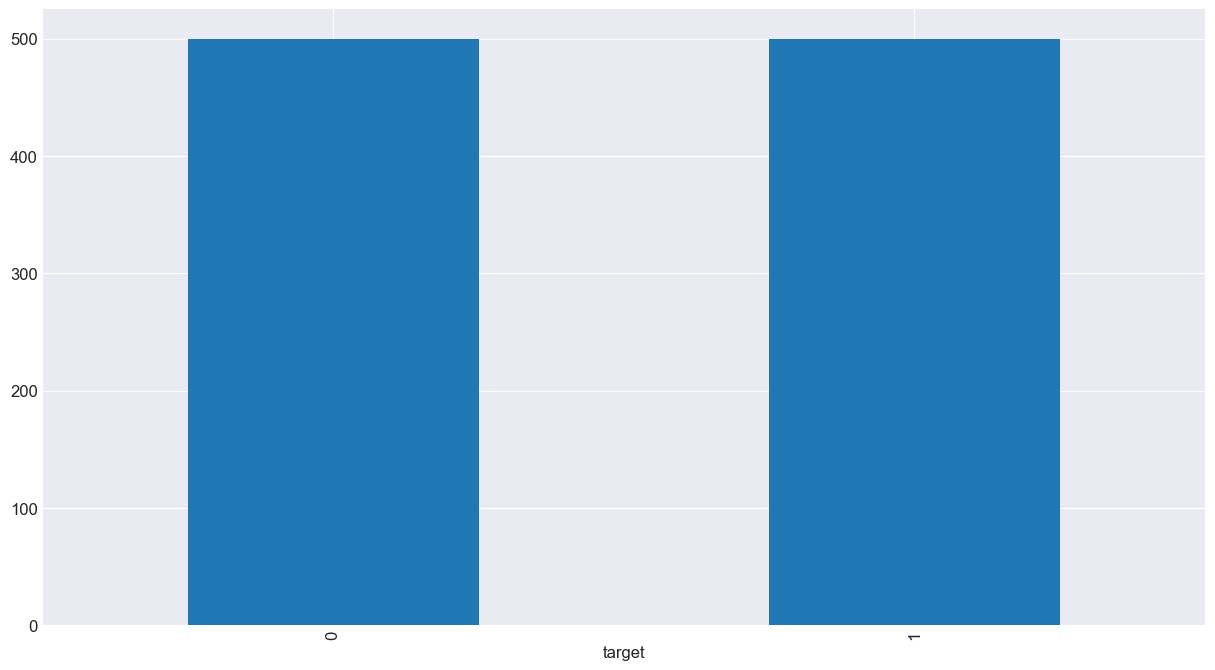

In [37]:
fig, ax = plt.subplots() # Instantiate
    
data_df['target'].value_counts().plot(ax=ax, kind='bar');

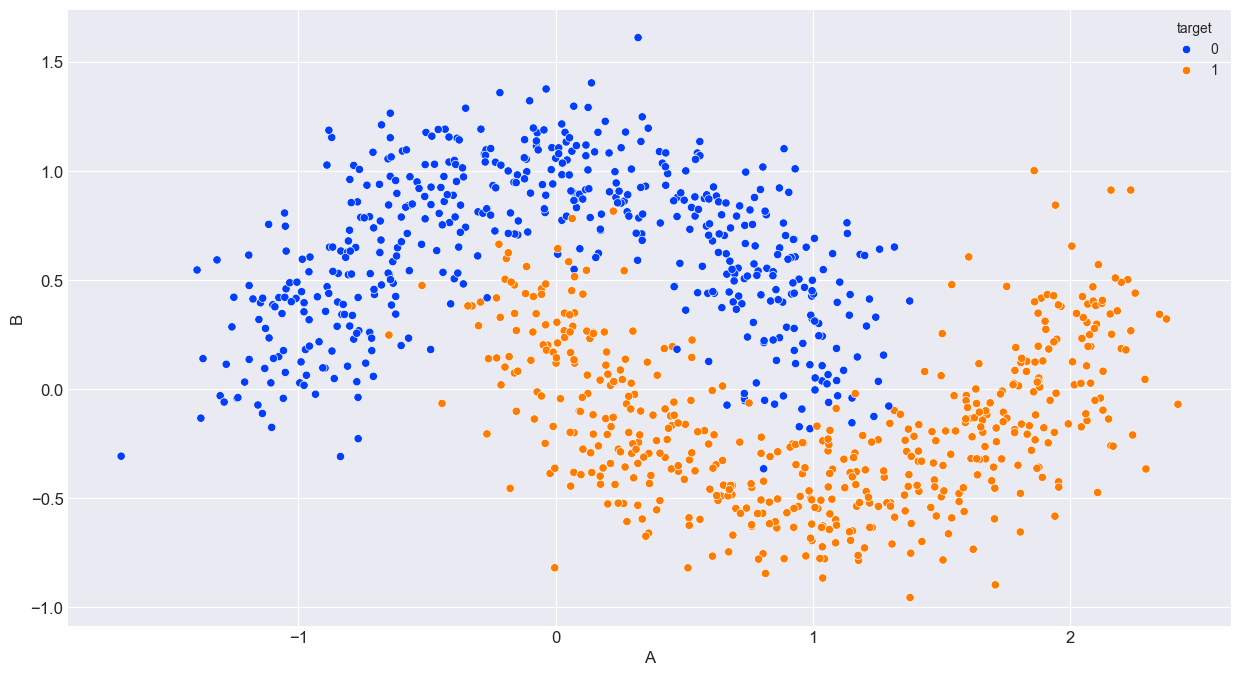

In [38]:
# Using Seaborn
ax = sns.scatterplot(data=data_df, # data from dataframe
                     x='A', y='B',  # X axis and y axis columns
                     palette=sns.color_palette("bright", 2), # color map
                     hue='target'); # Color as per target column

In [39]:
# data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]

In [40]:
# data_train.shape, data_test.shape

In [41]:
# rng.random(data_train.shape[1])

In [42]:
y.shape


(1000,)

In [43]:
y = pd.get_dummies(y).to_numpy()
y


array([[ True, False],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=TEST_SIZE,
                                                    stratify=y,
                                                    random_state=RANDOM_STATE)

In [45]:
def fn_softmax(z):
    '''
    Args:
        z : a matrix of z values of shape (m, n_output)
    returns:
        softmax values of z
    '''
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims= True) # keepdims = True avoids the python broadcasting which will results the size of m*n_outputs

In [46]:
t = fn_softmax(np.asarray([[8, 5, 0], [-10, 0, 10]]))
t.sum(axis=1).shape

(2,)

In [47]:
def fn_activ(x):

    return np.tanh(x)

def fn_activ_prime(x):

    return 1.0 - np.tanh(x)**2

In [48]:
def predict(model, X_p):

    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3'], model['W4'], model['b4'], model['W5'], model['b5']
    
    ### Forward Propagation
    # Layer 1
    z1 = X_p.dot(W1) + b1 # Aggregation
    a1 = fn_activ(z1) # Activation 

    # Layer 2
    z2 = a1.dot(W2) + b2 # Aggregation
    a2 = fn_activ(z2) # Activation 

    # Layer 3
    z3 = a2.dot(W3) + b3 # Aggregation
    a3 = fn_activ(z3) # Activation 

    # Layer 4
    z4 = a3.dot(W4) + b4 # Aggregation
    a4 = fn_activ(z4) # Activation 

    # Layer 5
    z5 = a4.dot(W5) + b5 # Aggregation
    a5 = fn_softmax(z5)  # Activation
    
    
    return np.argmax(a5, axis=1) # pick index of class with highest probability

In [49]:
def calculate_loss(model, X_l, y_l):
    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3'], model['W4'], model['b4'], model['W5'], model['b5']
    
    m = X_l.shape[0]

    # Layer 1
    z1 = X_l.dot(W1) + b1 # Aggregation
    a1 = fn_activ(z1) # Activation 

    # Layer 2
    z2 = a1.dot(W2) + b2 # Aggregation
    a2 = fn_activ(z2) # Activation 

    # Layer 3
    z3 = a2.dot(W3) + b3 # Aggregation
    a3 = fn_activ(z3) # Activation 

    # Layer 4
    z4 = a3.dot(W4) + b4 # Aggregation
    a4 = fn_activ(z4) # Activation 

    # Layer 5
    z5 = a4.dot(W5) + b5 # Aggregation
    a5 = fn_softmax(z5)  # Activation 
    
    data_loss = -(y_l*np.log(a5) + 
                  (1 - y_l) * np.log(1 - a5)).sum() # Binary

    return data_loss/m 

# Multiple Layers
- Input Layer
- Layer 1 - 5 - Tanh
- Layer 2 - 5 - Tanh
- Layer 3 - 4 - Tanh
- Layer 4 - 5 - Tanh
- Output Layer

In [50]:
# Model 
loss_hist = {}
param = {}
param['nn_dim'] = [X_train.shape[1], 5, 5, 4, 3] # Node Nums

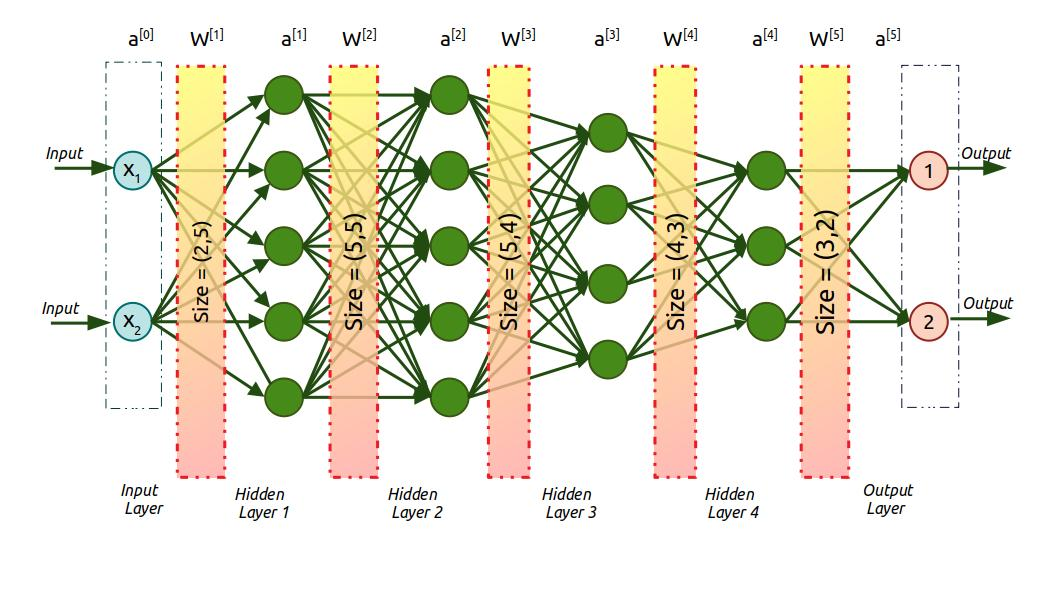

In [51]:
def build_model(param, X_tr, y_tr, nn_out, alpha=ALPHA ,epochs = EPOCHS):
    '''
    Args:
        X_tr : Training features
        y_tr : Training labels
        nn_hdim : Number of nodes in the hidden layer
        nn_out : Size of output
    '''
    m = X_tr.shape[0] # no. of rows, no. of inputs
    nn_output_dim = nn_out

    # Layer 1
    # size = 2,5
    W1 = np.random.rand(param['nn_dim'][0],
                        param['nn_dim'][1]) / np.sqrt(param['nn_dim'][0])
    # size = 5
    b1 = np.zeros((1, param['nn_dim'][1]), dtype= np.float32)

    # Layer 2
    # size = 5,5
    W2 = np.random.rand(param['nn_dim'][1],
                        param['nn_dim'][2]) / np.sqrt(param['nn_dim'][1])
    # size = 5
    b2 = np.zeros((1, param['nn_dim'][2]), dtype= np.float32)

    # Layer 3
    # size = 5,4
    W3 = np.random.rand(param['nn_dim'][2],
                        param['nn_dim'][3]) / np.sqrt(param['nn_dim'][2])
    # size = 5
    b3 = np.zeros((1, param['nn_dim'][3]), dtype= np.float32)

    # Layer 4
    # size = 4,3
    W4 = np.random.rand(param['nn_dim'][3],
                        param['nn_dim'][4]) / np.sqrt(param['nn_dim'][3])
    # size = 5
    b4 = np.zeros((1, param['nn_dim'][4]), dtype= np.float32)

    # Layer 5
    # size = 4,2
    W5 = np.random.rand(param['nn_dim'][4],
                        nn_output_dim) / np.sqrt(param['nn_dim'][4])
    # size = 2
    b5 = np.zeros((1, nn_output_dim), dtype= np.float32)

    curr_loss = 0
    loss, epoch = [], []

    for i in range(0, epochs):
        ### Forward Propagation

        # Layer 1
        z1 = X_tr.dot(W1) + b1 # Aggregation
        a1 = fn_activ(z1) # Activation 

        # Layer 2
        z2 = a1.dot(W2) + b2 # Aggregation
        a2 = fn_activ(z2) # Activation 

        # Layer 3
        z3 = a2.dot(W3) + b3 # Aggregation
        a3 = fn_activ(z3) # Activation 

        # Layer 4
        z4 = a3.dot(W4) + b4 # Aggregation
        a4 = fn_activ(z4) # Activation 

        # Layer 5
        z5 = a4.dot(W5) + b5 # Aggregation
        a5 = fn_softmax(z5)  # Activation 

    
        ### Back Propagation 
        # Layer 5
        assert (a5.shape == y_tr.shape), f'check y {a5.shape}/{y_tr.shape}'
        dz5 = a5 - y_tr ## REMEMBER dim of a2 and y_tr to be same

        dW5 = (a4.T).dot(dz5)
        assert(W5.shape == dW5.shape), f'check W5 {W5.shape}/{dW5.shape}'

        db5 = np.sum(dz5, axis= 0 , keepdims = True)
        assert(b5.shape == db5.shape), f'check b5 {b5.shape}/{db5.shape}'

        da4 = dz5.dot(W5.T)
        assert(a4.shape == da4.shape), f'check a4 {a4.shape}/{da4.shape}'

        # Layer 4
        dz4 = da4 * fn_activ_prime(z4)
        assert(z4.shape == dz4.shape), f'check z4 {z4.shape}/{dz4.shape}'
    
        dW4 = (a3.T).dot(dz4)
        assert(W4.shape == dW4.shape), f'check W4 {W4.shape}/{dW4.shape}'

        db4 = np.sum(dz4, axis= 0 , keepdims = True)
        assert(b4.shape == db4.shape), f'check b4 {b4.shape}/{db4.shape}'

        da3 = dz4.dot(W4.T)
        assert(a3.shape == da3.shape), f'check a3 {a3.shape}/{da3.shape}'
        
        # Layer 3
        dz3 = da3 * fn_activ_prime(z3)
        assert(z3.shape == dz3.shape), f'check z3 {z3.shape}/{dz3.shape}'
    
        dW3 = (a2.T).dot(dz3)
        assert(W3.shape == dW3.shape), f'check W3 {W3.shape}/{dW3.shape}'

        db3 = np.sum(dz3, axis= 0 , keepdims = True)
        assert(b3.shape == db3.shape), f'check b3 {b3.shape}/{db3.shape}'
        
        da2 = dz3.dot(W3.T)
        assert(a2.shape == da2.shape), f'check a2 {a2.shape}/{da2.shape}'
        
        # Layer 2
        dz2 = da2 * fn_activ_prime(z2)
        assert(z2.shape == dz2.shape), f'check z2 {z2.shape}/{dz2.shape}'
    
        dW2 = (a1.T).dot(dz2)
        assert(W2.shape == dW2.shape), f'check W2 {W2.shape}/{dW2.shape}'

        db2 = np.sum(dz2, axis= 0 , keepdims = True)
        assert(b2.shape == db2.shape), f'check b2 {b2.shape}/{db2.shape}'
        
        da1 = dz2.dot(W2.T)
        assert(a1.shape == da1.shape), f'check a1 {a1.shape}/{da1.shape}'
        
        # Layer 1
        dz1 = da1 * fn_activ_prime(z1)
        assert(z1.shape == dz1.shape), f'check z1 {z1.shape}/{dz1.shape}'
    
        dW1 = (X_tr.T).dot(dz1)
        assert(W1.shape == dW1.shape), f'check W1 {W1.shape}/{dW1.shape}'

        db1 = np.sum(dz1, axis= 0 , keepdims = True)
        assert(b1.shape == db1.shape), f'check b1 {b1.shape}/{db1.shape}'


        # Gradient Update
        W1 += -alpha * dW1/m
        b1 += -alpha * db1/m

        W2 += -alpha * dW2/m
        b2 += -alpha * db2/m
        
        W3 += -alpha * dW3/m
        b3 += -alpha * db3/m
        
        W4 += -alpha * dW4/m
        b4 += -alpha * db4/m
        
        W5 += -alpha * dW5/m
        b5 += -alpha * db5/m
        

        model = {'W1': W1, 'b1' : b1,
                 'W2': W2, 'b2' : b2,
                 'W3': W3, 'b3' : b3,
                 'W4': W4, 'b4' : b4,
                 'W5': W5, 'b5' : b5
                 }
    
        curr_loss = calculate_loss(model, X_tr, y_tr)
        loss.append(curr_loss)
        epoch.append(i)
        if i%100 == 0:
            print(f'After epoch: {i:3d}; loss: {curr_loss: .5f}')

    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss

    return model

In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800, 2), (200, 2))

In [53]:
# print(y_train.shape)
# y_train = y_train.reshape(-1, 1)
# y_train.shape

In [54]:
nn_out_dim = 2

model = build_model(param, X_train, y_train, nn_out_dim)

After epoch:   0; loss:  1.37874
After epoch: 100; loss:  1.19052
After epoch: 200; loss:  0.68124
After epoch: 300; loss:  0.64049
After epoch: 400; loss:  0.62980
After epoch: 500; loss:  0.61682
After epoch: 600; loss:  0.56623
After epoch: 700; loss:  0.29237
After epoch: 800; loss:  0.32822
After epoch: 900; loss:  0.20350
After epoch: 1000; loss:  0.18469
After epoch: 1100; loss:  0.17461
After epoch: 1200; loss:  0.16862
After epoch: 1300; loss:  0.16478
After epoch: 1400; loss:  0.16213
After epoch: 1500; loss:  0.16022
After epoch: 1600; loss:  0.15879
After epoch: 1700; loss:  0.15768
After epoch: 1800; loss:  0.15681
After epoch: 1900; loss:  0.15611
After epoch: 2000; loss:  0.15554
After epoch: 2100; loss:  0.15507
After epoch: 2200; loss:  0.15468
After epoch: 2300; loss:  0.15435
After epoch: 2400; loss:  0.15406
After epoch: 2500; loss:  0.15381
After epoch: 2600; loss:  0.15359
After epoch: 2700; loss:  0.15340
After epoch: 2800; loss:  0.15322
After epoch: 2900; loss:

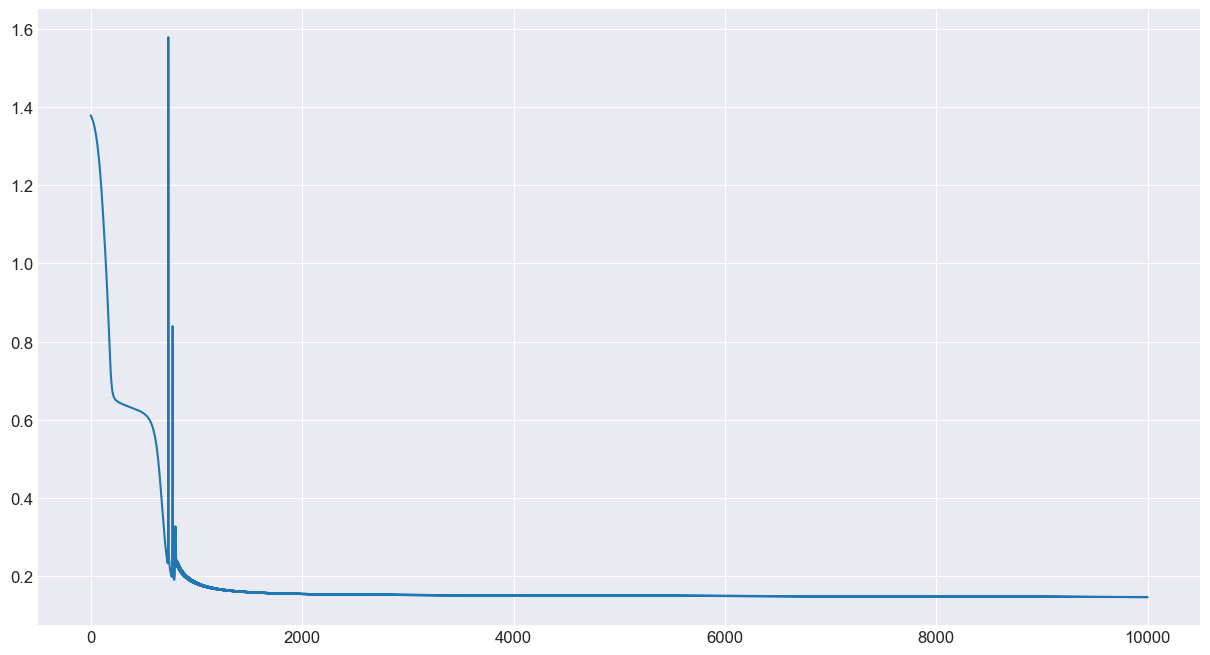

In [55]:
plt.plot(loss_hist['epoch'], loss_hist['loss'])

In [56]:
model

{'W1': array([[ 0.93743252,  2.173056  ,  0.70663317,  0.79874572,  0.75942517],
        [-0.42566944,  0.23103029, -0.3166399 , -0.37170033, -0.34608037]]),
 'b1': array([[ 0.42710355, -1.0555228 , -0.31314877, -0.6842566 , -0.5849731 ]],
       dtype=float32),
 'W2': array([[ 0.53325343,  0.14431369,  0.44682321,  0.75750347,  0.33705751],
        [-1.30163348, -0.43612504, -0.85792447, -1.13377302, -0.68590423],
        [ 0.55984351,  0.07646007,  0.27883374,  0.42566438,  0.40080314],
        [ 0.65122654,  0.39421642,  0.33071866,  0.4274871 ,  0.12574553],
        [ 0.47064923,  0.31669821,  0.40517271,  0.38250849,  0.32544018]]),
 'b2': array([[-0.10335376, -0.00163679, -0.02167086, -0.01155391,  0.05354522]],
       dtype=float32),
 'W3': array([[0.5280794 , 0.59329198, 0.44652655, 0.60210198],
        [0.21188367, 0.15935263, 0.2265052 , 0.03480251],
        [0.26869802, 0.2705445 , 0.29846947, 0.48922847],
        [0.44135718, 0.46576602, 0.548691  , 0.52463418],
        [0.

In [57]:
y_pred = predict(model, X_train)

accuracy_score(np.argmax(X_train, axis =1), y_pred)


0.2

Testing Accuracy

In [58]:
y_pred = predict(model, X_test)

accuracy_score(np.argmax(y_test, axis =1), y_pred)


0.98

In [59]:
cm = confusion_matrix(np.argmax(y_test, axis =1), y_pred)
cm

array([[99,  1],
       [ 3, 97]], dtype=int64)

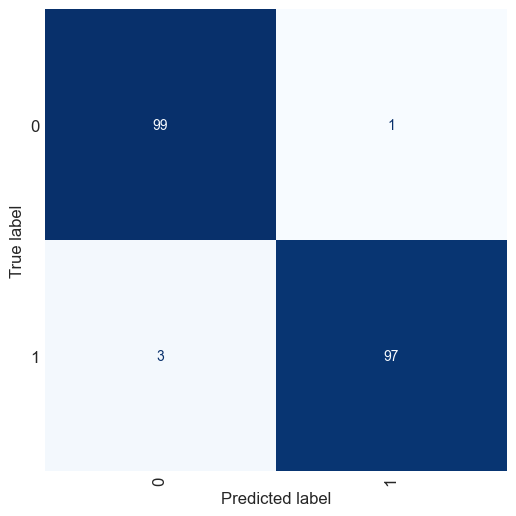

In [60]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
fig, ax = plt.subplots(figsize = (6,6))

disp.plot(ax = ax, cmap = 'Blues', xticks_rotation = 'vertical', colorbar=False)
# Disable the grid
ax.grid(False)

plt.show();

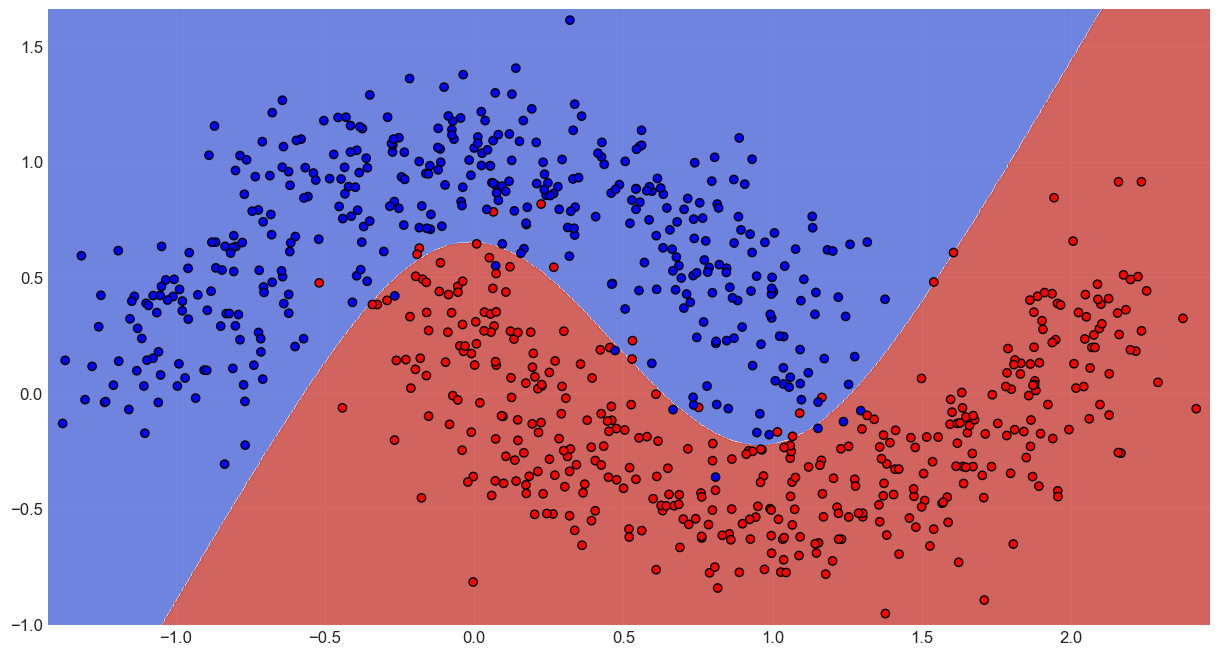

In [61]:
X = X_train

fig, ax = plt.subplots()
dm = 0.005 # Smoothen the curve

X_min, X_max = X[:,0].min() - 0.05, X[:,0].max() + 0.05
y_min, y_max = X[:,1].min() - 0.05, X[:,1].max() + 0.05

xx, yy = np.meshgrid(np.arange(X_min, X_max, dm),
                     np.arange(y_min, y_max, dm))

XX = np.c_[xx.ravel(), yy.ravel()]
# XX = np.hstack((XX, np.ones((XX.shape[0],1))))

y_pred = predict(model, XX)

# for row in XX:
#     pred = predict(row, model)
#     y_pred.append(np.round(pred)) # to get only 2 sections in the contour, we used np.round(pred)

Z = np.array(y_pred).reshape(xx.shape)

ax.contourf(xx, yy, Z, cmap=CMAP, alpha=0.8)
ax.scatter(X[:,0], X[:,1], c = y_train.argmax(axis=1),edgecolors='k', cmap=plt.cm.bwr, marker='o');

In [62]:
xx.shape, yy.shape

((534, 780), (534, 780))

In [65]:
!pip show tensorflow

In [64]:
import tensorflow
tensorflow.__version__

'2.16.1'